In [144]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline 
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Times']})
#rc('font',**{'family':'serif','serif':['Times']})
import seaborn as sns


from astropy.table import Table

from IPython.display import Image #this allows us to look at some periodograms 
from K2fov import plot
import matplotlib.patheffects as path_effects
pd.set_option('display.max_columns', None)

import mesa_reader as mr #for some stellar tracks later

#Live dangerously
import warnings
warnings.filterwarnings("ignore")

In [145]:
df=pd.read_table('ColmanTable_NGC6791_FullTable.dat',delimiter=' ')  
df[0:3]

,RA,DEC,KEPID,mmd_flux,mmd_mag,GaiaID,KIC,TIC,Vmag,Jmag,Kmag,kepmag,Imag,Rmag,Bmag,Gmag,bp_rp,pmra,pmdec,pmra_error,pmdec_error,radial_velocity,rv_template_logg,rv_template_fe_h,Rad,Mass,Lum,logg,LClass,astrometric_excess_noise,Teff,distance,e_Dist,a_g_val,parallax,parallax_error,ProbCluster,phot_variable_flag
0,290.143494,37.695015,2297113,0.002837,0.003081,2051286516703820800,2297113,122365243,17.69,15.96,15.68,17.404,16.79,16.71,17.78,17.604105,0.955750,-0.431510,-2.510611,0.175214,0.201662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.213420,NaN,0.000642,0,NaN,0.155937,0.118379,1.0,0
1,290.145233,37.696278,2297125,0.003733,0.004052,2051286520994703488,2297125,1876768064,19.38,19.73,NaN,17.797,17.97,18.28,20.14,19.104200,1.122255,-0.060361,-3.141069,0.433938,0.493377,NaN,NaN,NaN,NaN,0.93,NaN,NaN,0,0.000000,NaN,0.000889,0,NaN,-0.236977,0.318824,0.0,0
2,290.149750,37.690624,2297143,0.003697,0.004013,2051286516693478272,2297143,122365263,17.79,16.19,15.24,17.647,16.74,17.40,18.10,17.589773,1.127913,-0.357800,-2.434853,0.184330,0.186677,NaN,NaN,NaN,NaN,0.84,NaN,NaN,0,0.323324,NaN,0.000750,0,NaN,0.261520,0.116557,1.0,0


In [146]:
df_BSS=df[(df.Gmag<=17)&(df.bp_rp<=1.3)&df.bp_rp>=0.5]

In [147]:
df_not=df[(df.Gmag>17)&(df.bp_rp>1.3)&df.bp_rp<0.5]

In [148]:
len(df)

1384

Text(0.5, 0, 'B-R')

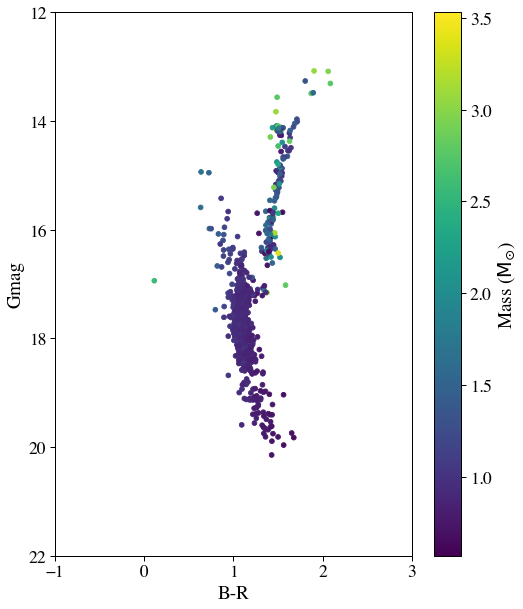

In [149]:
plt.figure(figsize=(8,10))
plt.scatter(df.bp_rp,df.Gmag,c=df.Mass)
plt.xlim(-1,3)
plt.ylim(22,12)
plt.colorbar(label='Mass ($\mathrm{M_{\odot}}$)')
plt.ylabel('Gmag')
plt.xlabel('B-R')

Text(0.5, 0, 'B-R')

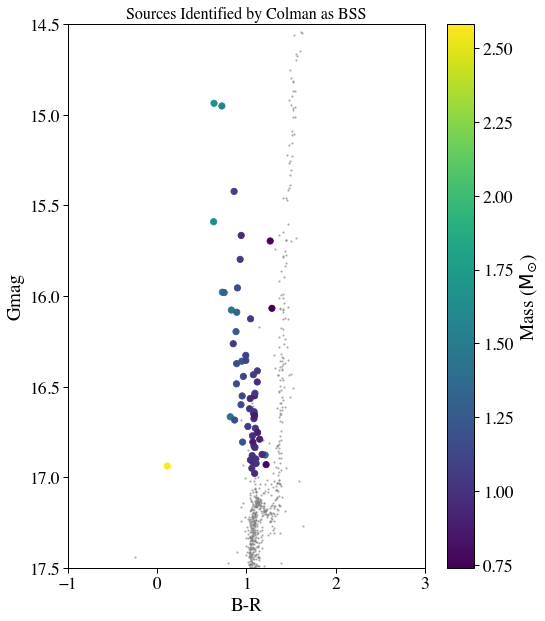

In [150]:
plt.figure(figsize=(8,10))
sns.set_context("paper", font_scale=2)
plt.scatter(df.bp_rp,df.Gmag,c='grey',s=2.0,alpha=0.5)
plt.scatter(df.bp_rp[(df.Gmag<17)&(df.bp_rp<1.3)&df.bp_rp>0.5],\
            df.Gmag[(df.Gmag<17)&(df.bp_rp<1.3)&df.bp_rp>0.5],\
            c=df.Mass[(df.Gmag<17)&(df.bp_rp<1.3)&df.bp_rp>0.5],s=40)
#plt.scatter(df.bp_rp[df.KEPID==2570281],df.Gmag[df.KEPID==2570281],marker='*',color='red',s=200)
plt.xlim(-1,3)
plt.ylim(17.5,14.5)
plt.colorbar(label='Mass ($\mathrm{M_{\odot}}$)')
plt.title('Sources Identified by Colman as BSS',fontsize=16)
plt.ylabel('Gmag')
plt.xlabel('B-R')

Text(0.5, 1.0, 'Mass Distribution \n Sources Identified by Colman as BSS')

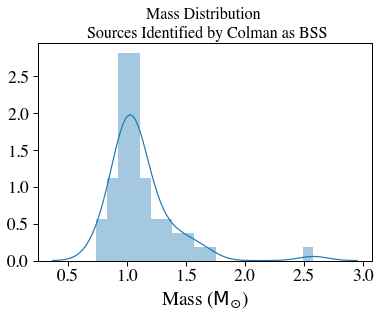

In [151]:
sns.distplot(df_BSS.Mass,bins=20)
plt.xlabel('Mass ($\mathrm{M_{\odot}}$)')
plt.title('Mass Distribution \n Sources Identified by Colman as BSS',fontsize=16)

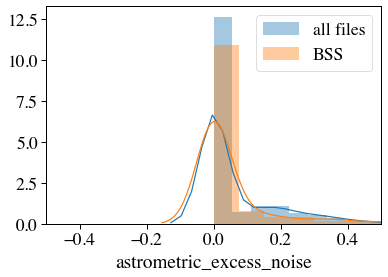

In [152]:
sns.distplot(df_not.astrometric_excess_noise,label='all files')
sns.distplot(df_BSS.astrometric_excess_noise,label='BSS')
plt.xlim(-0.5,0.5)
plt.legend()

Text(0.5, 0, 'B-R')

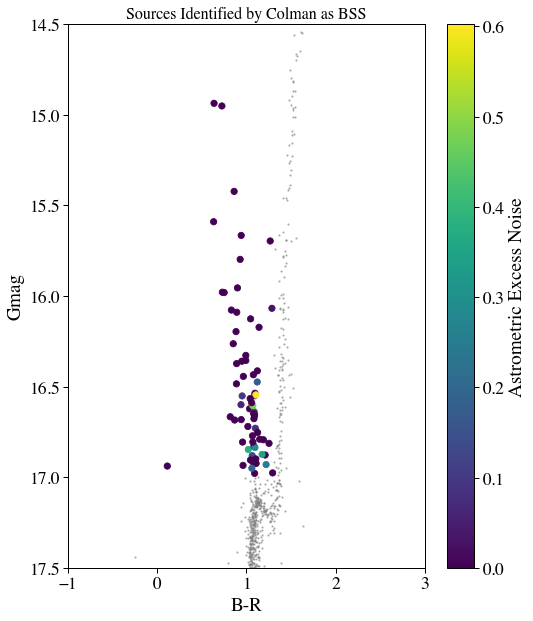

In [153]:
plt.figure(figsize=(8,10))
plt.scatter(df.bp_rp,df.Gmag,c='grey',s=2.0,alpha=0.5)
plt.scatter(df.bp_rp[(df.Gmag<17)&(df.bp_rp<1.3)&df.bp_rp>0.5],\
            df.Gmag[(df.Gmag<17)&(df.bp_rp<1.3)&df.bp_rp>0.5],\
            c=df.astrometric_excess_noise[(df.Gmag<17)&(df.bp_rp<1.3)&df.bp_rp>0.5],s=40)
plt.xlim(-1,3)
plt.ylim(17.5,14.5)
plt.colorbar(label='Astrometric Excess Noise')
plt.title('Sources Identified by Colman as BSS',fontsize=16)
plt.ylabel('Gmag')
plt.xlabel('B-R')

In [154]:
df.columns

Index(['RA', 'DEC', 'KEPID', 'mmd_flux', 'mmd_mag', 'GaiaID', 'KIC', 'TIC',
       'Vmag', 'Jmag', 'Kmag', 'kepmag', 'Imag', 'Rmag', 'Bmag', 'Gmag',
       'bp_rp', 'pmra', 'pmdec', 'pmra_error', 'pmdec_error',
       'radial_velocity', 'rv_template_logg', 'rv_template_fe_h', 'Rad',
       'Mass', 'Lum', 'logg', 'LClass', 'astrometric_excess_noise', 'Teff',
       'distance', 'e_Dist', 'a_g_val', 'parallax', 'parallax_error',
       'ProbCluster', 'phot_variable_flag'],
      dtype='object')

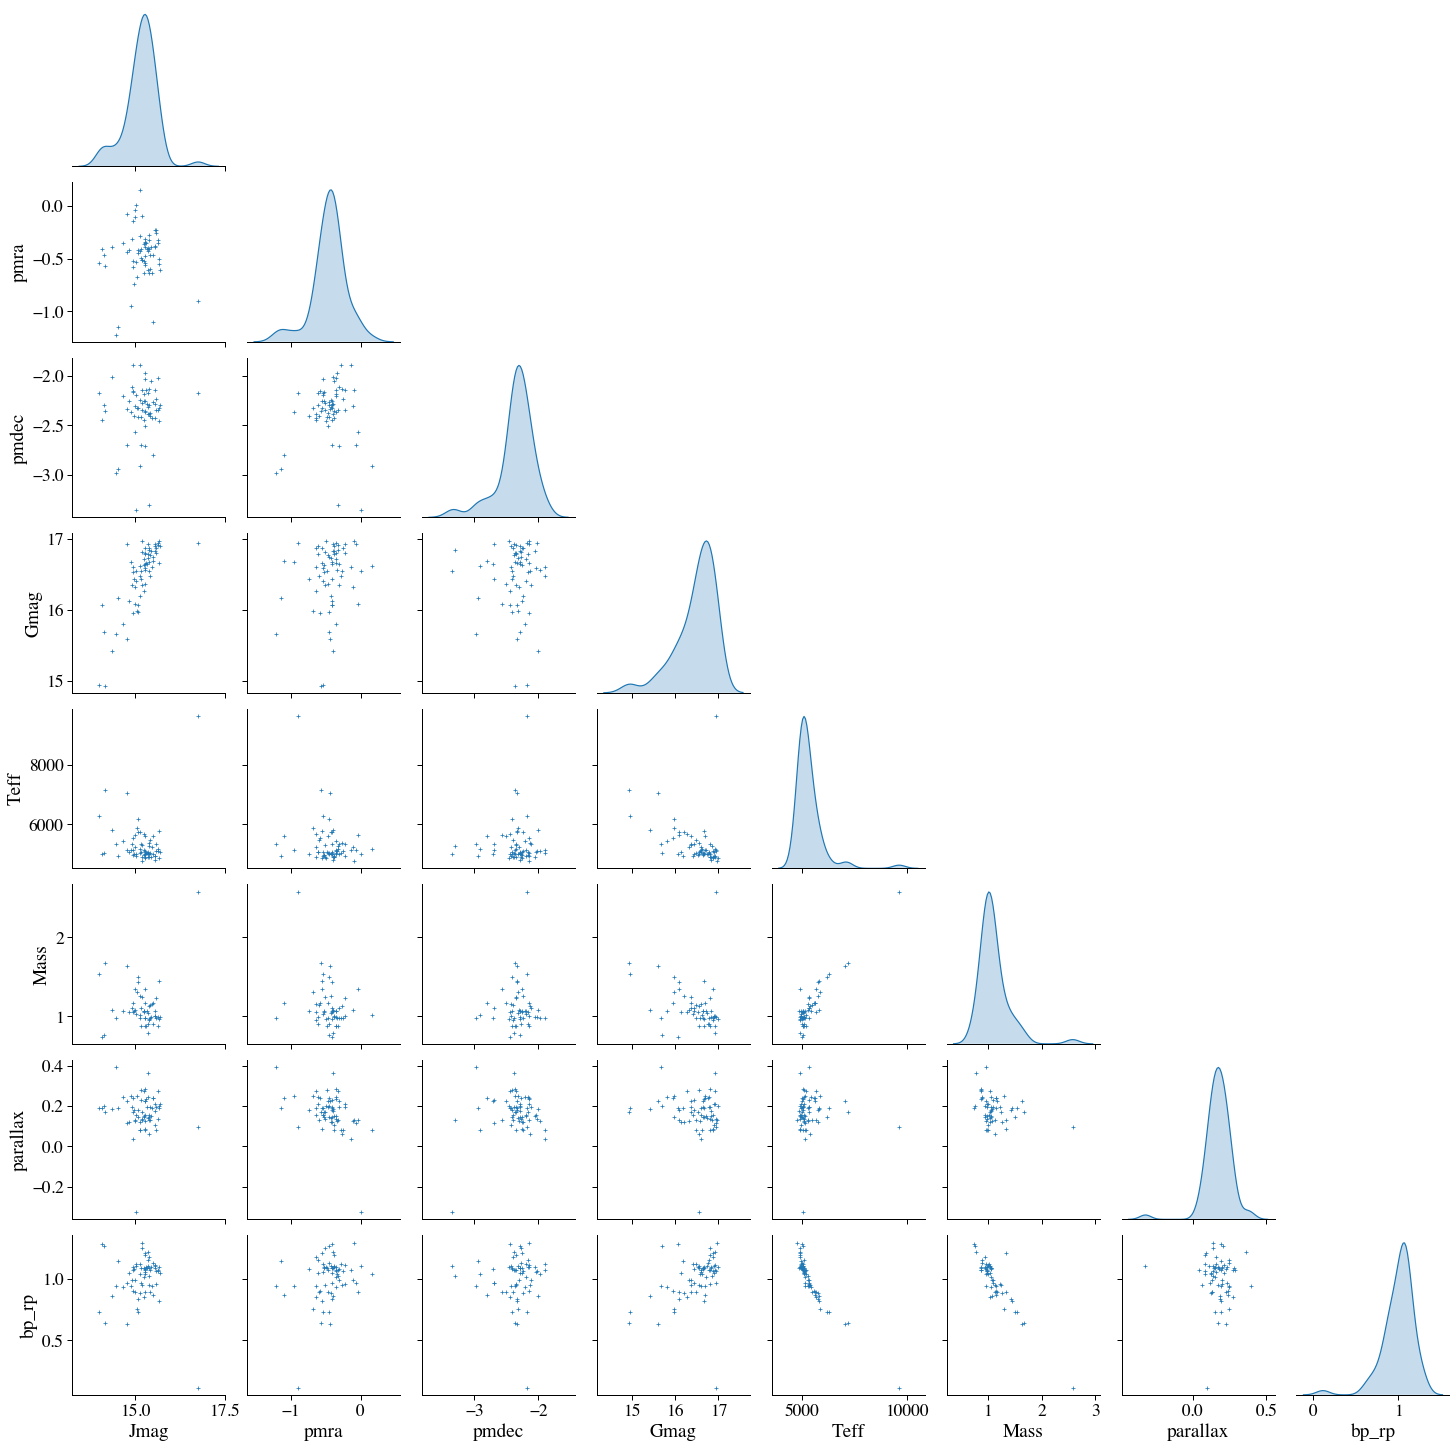

In [155]:
sns.pairplot(df_BSS, vars=["Jmag","pmra","pmdec","Gmag","Teff","Mass",'parallax','bp_rp'],\
             corner=True,diag_kind="kde", markers="+")

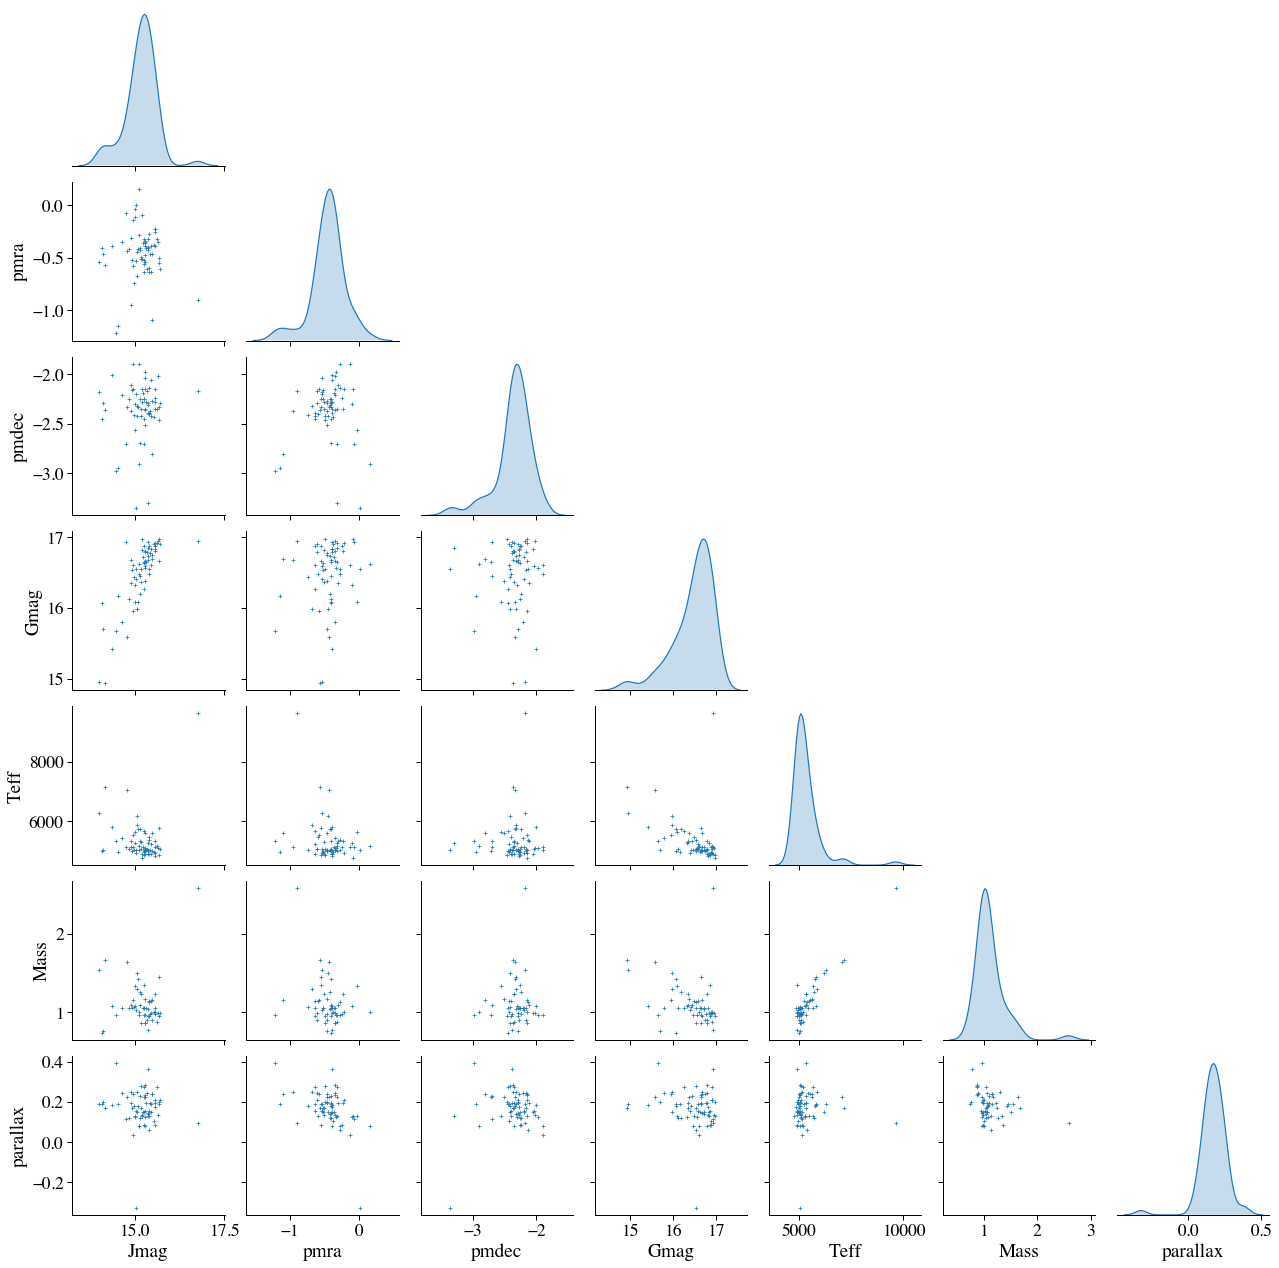

In [157]:
sns.pairplot(df_BSS, vars=["Jmag","pmra","pmdec","Gmag","Teff","Mass",'parallax'],\
             corner=True,diag_kind="kde", markers="+")

In [158]:
df.columns

Index(['RA', 'DEC', 'KEPID', 'mmd_flux', 'mmd_mag', 'GaiaID', 'KIC', 'TIC',
       'Vmag', 'Jmag', 'Kmag', 'kepmag', 'Imag', 'Rmag', 'Bmag', 'Gmag',
       'bp_rp', 'pmra', 'pmdec', 'pmra_error', 'pmdec_error',
       'radial_velocity', 'rv_template_logg', 'rv_template_fe_h', 'Rad',
       'Mass', 'Lum', 'logg', 'LClass', 'astrometric_excess_noise', 'Teff',
       'distance', 'e_Dist', 'a_g_val', 'parallax', 'parallax_error',
       'ProbCluster', 'phot_variable_flag'],
      dtype='object')

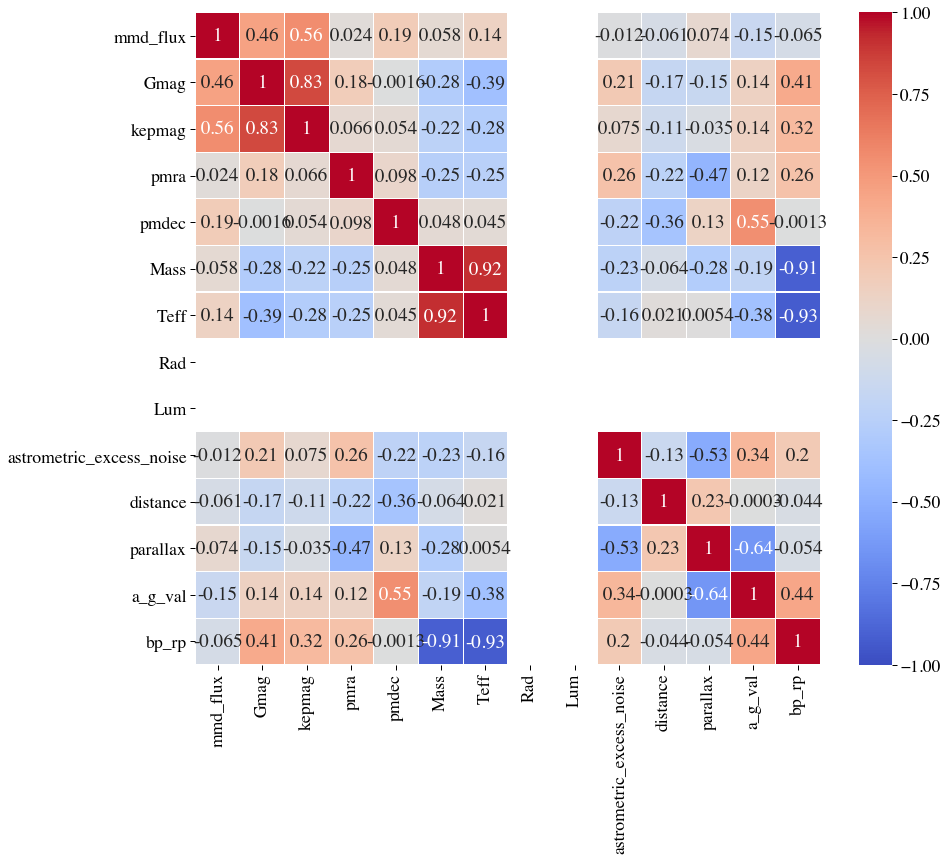

In [159]:
df_trunc=df_BSS[['mmd_flux','Gmag','kepmag','pmra','pmdec','Mass','Teff','Rad','Lum',\
            'astrometric_excess_noise','distance','parallax','a_g_val','bp_rp']]
plt.figure(figsize=(14,12))
sns.heatmap(df_trunc.corr(),annot=True,linewidth=0.1,vmin=-1,vmax=1,cmap='coolwarm')

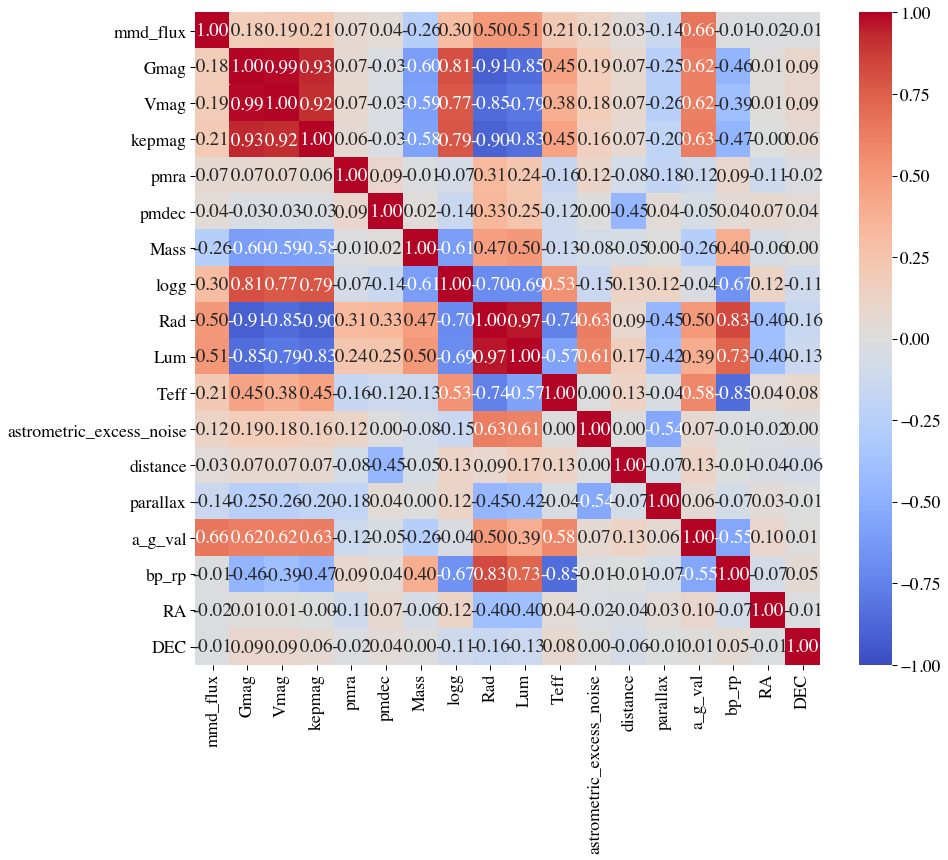

In [162]:
df_trunc=df[['mmd_flux','Gmag','Vmag','kepmag','pmra','pmdec','Mass','logg','Rad','Lum','Teff',\
            'astrometric_excess_noise','distance','parallax','a_g_val','bp_rp','RA','DEC']]
plt.figure(figsize=(14,12))
sns.heatmap(df_trunc.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm',fmt=".2f")

(-0.01, 0.01)

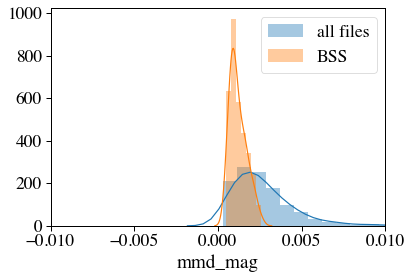

In [163]:
sns.distplot(df_not.mmd_mag,label='all files')
sns.distplot(df_BSS.mmd_mag,label='BSS')
plt.legend()
plt.xlim(-0.01,0.01)

Colman's BSS tend to have lower mmd scatter